In [3]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import  StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor, LinearRegression
from pyspark.ml import Pipeline, PipelineModel
from pyspark.ml.evaluation import RegressionEvaluator
import seaborn as sns
import matplotlib.pyplot as plt

from utils import read_process_df

from pyspark_utils.data_prep import prepare_data
#from pyspark_utils.train import train_model
from pyspark_utils.evaluate import evaluate_model

In [2]:
spark = SparkSession.builder.appName('test_model').getOrCreate()
spark

your 131072x1 screen size is bogus. expect trouble
23/09/01 04:14:03 WARN Utils: Your hostname, Bhaiyu resolves to a loopback address: 127.0.1.1; using 172.17.120.207 instead (on interface eth0)
23/09/01 04:14:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/01 04:14:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/09/01 04:14:05 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [4]:
df_test_processed = read_process_df('/home/abhishek-wsl/codes/MLops_project/data/test_data/green_tripdata_2023-01.parquet',spark)

67613 6


In [5]:
si = PipelineModel.load('/home/abhishek-wsl/codes/MLops_project/trained_models/stringindexer_PipelineModel')
ohe = PipelineModel.load('/home/abhishek-wsl/codes/MLops_project/trained_models/encoderindexer_PipelineModel')

In [6]:
categorical_cols = ['VendorID','pu_hour','pu_weekday','PU_DO']
label_col = 'duration'
encoded_df_test, _, _ = prepare_data(df_test_processed,categorical_cols,si,ohe,is_test=True)

In [7]:
trained_lr_model = PipelineModel.load('/home/abhishek-wsl/codes/MLops_project/trained_models/lr_PipelineModel')

In [8]:
_ = evaluate_model(trained_lr_model,encoded_df_test,label_col,metric='rmse')

23/09/01 04:16:47 WARN DAGScheduler: Broadcasting large task binary with size 1643.5 KiB


rmse  : 6.429551134910861


In [9]:
pred = trained_lr_model.transform(encoded_df_test)
pred.show(2)

+--------+-------+----------+-------+-------------+--------+--------------+-------------+----------------+-----------+---------------+---------------+-----------------+-------------------+--------------------+-----------------+
|VendorID|pu_hour|pu_weekday|  PU_DO|trip_distance|duration|VendorID_index|pu_hour_index|pu_weekday_index|PU_DO_index|VendorID_onehot| pu_hour_onehot|pu_weekday_onehot|       PU_DO_onehot|            features|       prediction|
+--------+-------+----------+-------+-------------+--------+--------------+-------------+----------------+-----------+---------------+---------------+-----------------+-------------------+--------------------+-----------------+
|       2|      0|         1|166_143|         2.58|   11.02|           0.0|         17.0|             6.0|      131.0|  (3,[0],[1.0])|(24,[17],[1.0])|    (7,[6],[1.0])|(14288,[131],[1.0])|(14323,[0,1,21,34...|11.18596610860492|
|       2|      0|         1|  24_43|         1.81|    6.77|           0.0|         17.0

/tmp/ipykernel_15874/948380185.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred.select('prediction').toPandas(), label='prediction')
/tmp/ipykernel_15874/948380185.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred.select('duration').toPandas(), label='actual')


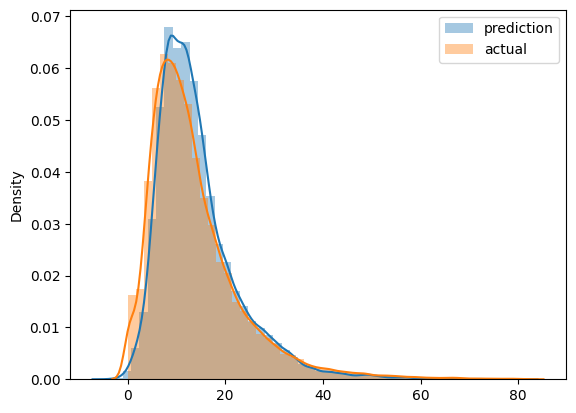

In [18]:
sns.distplot(pred.select('prediction').toPandas(), label='prediction')
sns.distplot(pred.select('duration').toPandas(), label='actual')

plt.legend()